In [1]:
# What was the best month for sale ? / How much was earned that month ?
# Which city had the highest number of sales?
# What time should we display advertisements to maximize likelihood of customer’s buying product ?
# What Products are most often sold together ?
# What Product sold the most?

In [1]:
import os
import pandas as pd
path = "C:\\Users\\HP\\Documents\\DATASCIENCE\\MATPLOTLIB\\PRACTICE\\Pandas-Data-Science-Tasks\\SalesAnalysis\\Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')]
concat_files = pd.DataFrame()
for item in files:
    eachfile = path + "/" + item
    allfiles = pd.read_csv(eachfile)
    concat_files = pd.concat([concat_files, allfiles])
# concat_files


In [2]:
concat_files.dropna(how="all", inplace=True)

In [3]:
concat_files

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
idtodrop = concat_files[concat_files["Quantity Ordered"] == "Quantity Ordered"].index
concat_files.drop(idtodrop, inplace=True)

concat_files["Price Each"] = pd.to_numeric(concat_files["Price Each"])
concat_files["Quantity Ordered"] = pd.to_numeric(concat_files["Quantity Ordered"])
concat_files["Sales"] = concat_files["Price Each"] * concat_files["Quantity Ordered"]
concat_files

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99


In [5]:
concat_files['Month'] = pd.to_datetime(concat_files['Order Date']).dt.month
concat_files.groupby("Month")["Sales"].sum()

Month
1     1786511.29
2     2158127.48
3     2755969.40
4     3336376.42
5     3101881.04
6     2524464.99
7     2587444.91
8     2191698.31
9     2050361.26
10    3679254.16
11    3149785.09
12    4557905.42
Name: Sales, dtype: float64

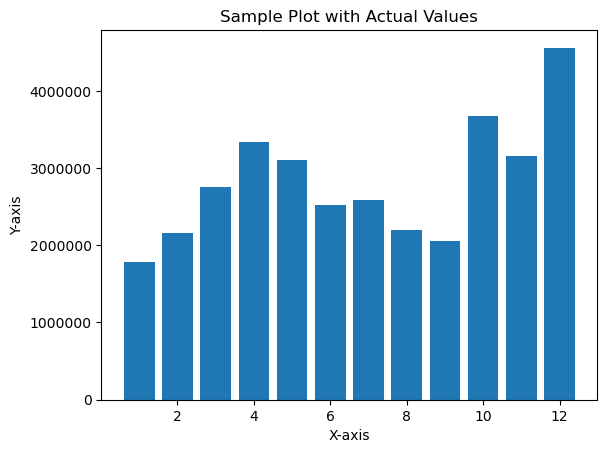

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# plt.bar([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], concat_files.groupby("Month").sum()["Sales"])

fig, ax = plt.subplots()
ax.bar([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], concat_files.groupby("Month").sum()["Sales"])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Sample Plot with Actual Values')

# Apply the ScalarFormatter to the y-axis
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')  # Ensure plain formatting

plt.show()


In [7]:
concat_files['City'] = concat_files["Purchase Address"].str.split(",").str[1]
concat_files


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9,San Francisco


In [8]:
concat_files.groupby("City")["Sales"].sum().sort_values(ascending=False)

City
 San Francisco    8124120.94
 Los Angeles      5354039.93
 New York City    4581658.91
 Boston           3604080.86
 Atlanta          2741642.05
 Dallas           2717793.72
 Seattle          2693048.60
 Portland         2276649.24
 Austin           1786745.52
Name: Sales, dtype: float64

<BarContainer object of 9 artists>

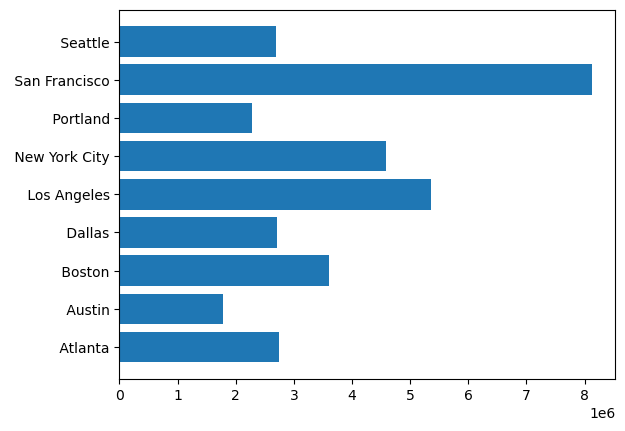

In [9]:
plt.barh(concat_files.groupby("City")["Sales"].sum().index, concat_files.groupby("City")["Sales"].sum())


In [10]:
concat_files["Hour"] = pd.to_datetime(concat_files['Order Date']).dt.hour
concat_files

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9,Los Angeles,20
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,San Francisco,16
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9,San Francisco,17


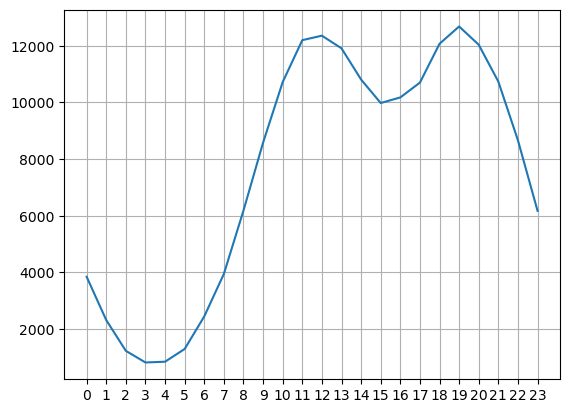

In [11]:
hour_val = concat_files['Hour'].value_counts().sort_index()
plt.plot(hour_val.index, hour_val)
plt.xticks(hour_val.index)
plt.grid()
plt.show()

In [19]:
duplicated_id = concat_files[concat_files['Order ID'].duplicated(keep=False)]
duplicated_id["All Products"] = duplicated_id.groupby("Order ID")['Product'].transform(lambda x: ",".join(x))
all_products = duplicated_id[["All Products", "Order ID"]].drop_duplicates()
# all_products
duplicated_id

C:\Users\HP\AppData\Local\Temp\ipykernel_2224\843736329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_id["All Products"] = duplicated_id.groupby("Order ID")['Product'].transform(lambda x: ",".join(x))


,All Products,Order ID
3,"Google Phone,Wired Headphones",176560
18,"Google Phone,USB-C Charging Cable",176574
30,"Bose SoundSport Headphones,Bose SoundSport Hea...",176585
32,"AAA Batteries (4-pack),Google Phone",176586
119,"Lightning Charging Cable,USB-C Charging Cable",176672
...,...,...
11617,"Apple Airpods Headphones,Apple Airpods Headphones",259296
11620,"Lightning Charging Cable,Lightning Charging Cable",259297
11627,"34in Ultrawide Monitor,AA Batteries (4-pack)",259303
11639,"Wired Headphones,AAA Batteries (4-pack)",259314


In [39]:
all_products

3                            Google Phone,Wired Headphones
18                       Google Phone,USB-C Charging Cable
30       Bose SoundSport Headphones,Bose SoundSport Hea...
32                     AAA Batteries (4-pack),Google Phone
119          Lightning Charging Cable,USB-C Charging Cable
                               ...                        
19201                                  iPhone,20in Monitor
19416    Google Phone,USB-C Charging Cable,Wired Headph...
1676                     LG Dryer,Lightning Charging Cable
2629                              ThinkPad Laptop,LG Dryer
4840              LG Washing Machine,AA Batteries (4-pack)
Name: All Products, Length: 361, dtype: object

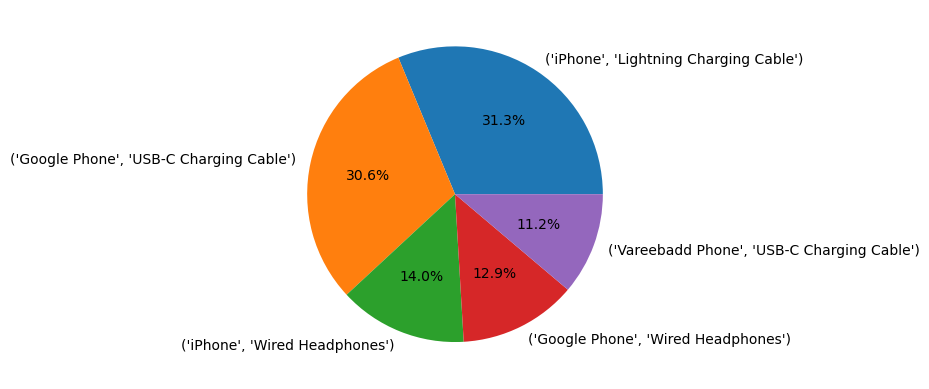

In [24]:
from itertools import combinations
from collections import Counter

all_items = Counter()
x_axis = []
y_axis = []
for prod in all_products["All Products"]:
    prod_list = prod.split(",")
    all_items.update(Counter(combinations(prod_list, 2)))

for key, val in all_items.most_common():
    x_axis.append(key)
    y_axis.append(val)

plt.pie(y_axis[:5], labels=x_axis[:5], autopct="%1.1f%%")
plt.show()

In [78]:
most_sold = concat_files.groupby("Product")["Quantity Ordered"].sum()
most_sold

Product
20in Monitor                   4058
27in 4K Gaming Monitor         6134
27in FHD Monitor               7429
34in Ultrawide Monitor         6076
AA Batteries (4-pack)         27148
AAA Batteries (4-pack)        30487
Apple Airpods Headphones      15383
Bose SoundSport Headphones    13236
Flatscreen TV                  4724
Google Phone                   5440
LG Dryer                        640
LG Washing Machine              649
Lightning Charging Cable      22841
Macbook Pro Laptop             4645
ThinkPad Laptop                4054
USB-C Charging Cable          23555
Vareebadd Phone                2023
Wired Headphones              20201
iPhone                         6732
Name: Quantity Ordered, dtype: int64

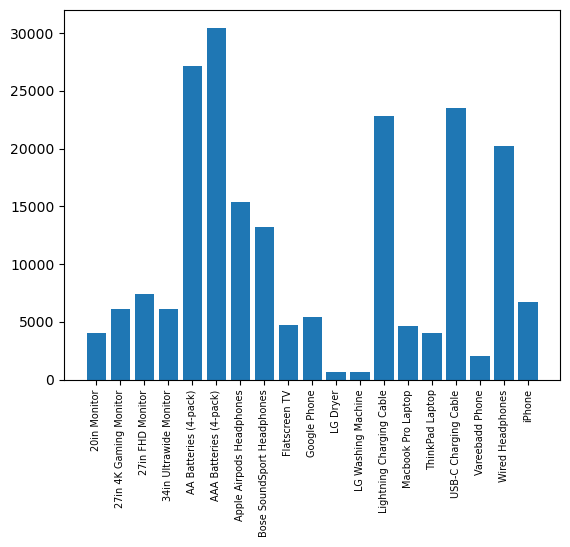

In [83]:
plt.bar(most_sold.index, most_sold)
plt.xticks(most_sold.index, rotation="vertical", size="7")
plt.show()

In [84]:
concat_files.corr(method="pearson")

,Quantity Ordered,Price Each,Sales,Month,Hour
Quantity Ordered,1.000000,-0.148130,-0.139295,0.001025,-0.002136
Price Each,-0.148130,1.000000,0.999200,-0.003476,0.001736
Sales,-0.139295,0.999200,1.000000,-0.003578,0.001671
Month,0.001025,-0.003476,-0.003578,1.000000,0.001532
Hour,-0.002136,0.001736,0.001671,0.001532,1.000000


<AxesSubplot:>

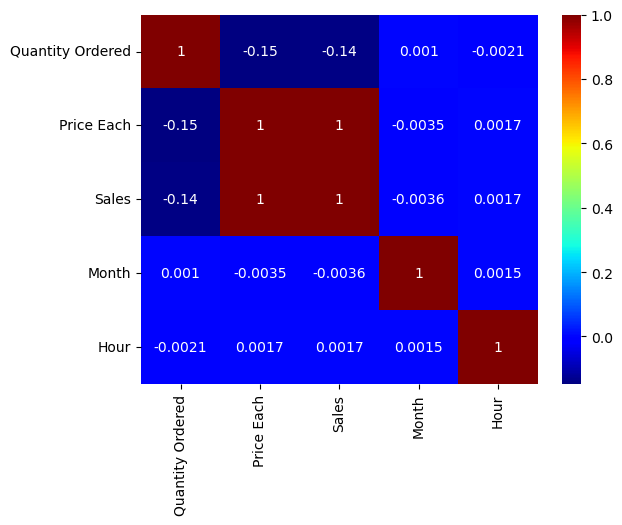

In [94]:
import seaborn as sns
sns.heatmap(concat_files.corr(), cmap="jet", annot=True)